<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
EVENT_VARIABLES = ['CHILD_DISORDER', 'DEATH_CHILD', 'DEATH_FATHER',
                   'DEATH_HH_PERSON', 'DEATH_MOTHER', 'DEATH_PARTNER',
                   'DIVORCED', 'HH_COMP_CHANGE', 'LAST_JOB_ENDED',
                   'LAST_JOB_ENDED_LIMITED', 'LEGALLY_HANDICAPPED_PERC',
                   'PREGNANCY_UNPLANNED', 'SEPARATED']

CONTROLS = ['AGE', 'EDUCATION_GROUPS_ISCED97', 'GENDER', 
            'HH_NET_INCOME_YEAR', 'MARITAL_STATUS',
            'MIGRATION_STATUS', ]

def inspect(df, event, row_cond=None):
    related_columns = [i for i in df if event in i]
    if row_cond is None:
        return df.loc[:, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]
    else:
        return df.loc[row_cond, ['ID', 'YEAR', 'MIGRATION_STATUS'] + related_columns]

In [32]:
df = pd.read_pickle('../../bld/out/data/panel.pkl')

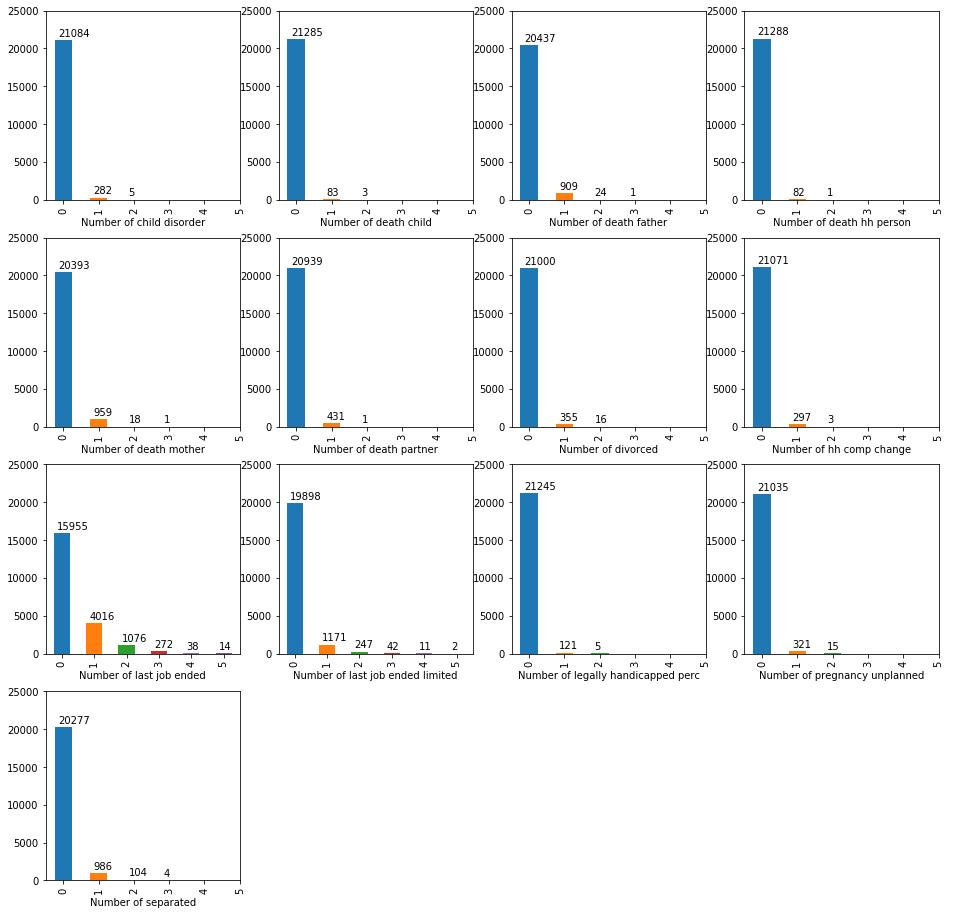

In [79]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=False)

axs = axs.flatten()

for i, event in enumerate(EVENT_VARIABLES):
    data = df['EVENT_' + event + '_COUNT'].value_counts()
    data.plot.bar(ax=axs[i])
    for x, y in data.iteritems():
        axs[i].annotate(xy=(x - 0.15, y + 500), s=y)

    axs[i].set_xticks(list(range(6)))
    axs[i].set_xticklabels(list(range(6)))

    axs[i].set_xlabel('Number of ' + event.replace('_', ' ').lower())

    axs[i].set_ylim(0, 25000)

for i in range(13, 16):
    axs[i].axis('off')